In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise

# Everything starts with a question


#### How to make a computer understand the image?
#### How to extract features?
8b3f1dc4761842d09e08fbe896d173d55de13c7b-1198x634.avif


## How to detect things and calculate new pixels?
- Pixel-Level
- Local (Neighborhood-Based)
- Global

## Problem: Raw pixel values alone don’t describe edges, textures, or patterns
## Solution: Kernels (small matrices) slide over the image to highlight features

# Convolutions and Kernels
another name of kernels: feature detectors


> it is actually not the real convolution, it is 'Cross-Correlation' in mathematics but everyone in ML-Community calls it convolution because the extracted features are the same anyway




$$
J(x, y) = \sum_{i=-a}^{a} \sum_{j=-b}^{b} w(i, j) \, I(x + i, y + j)
$$


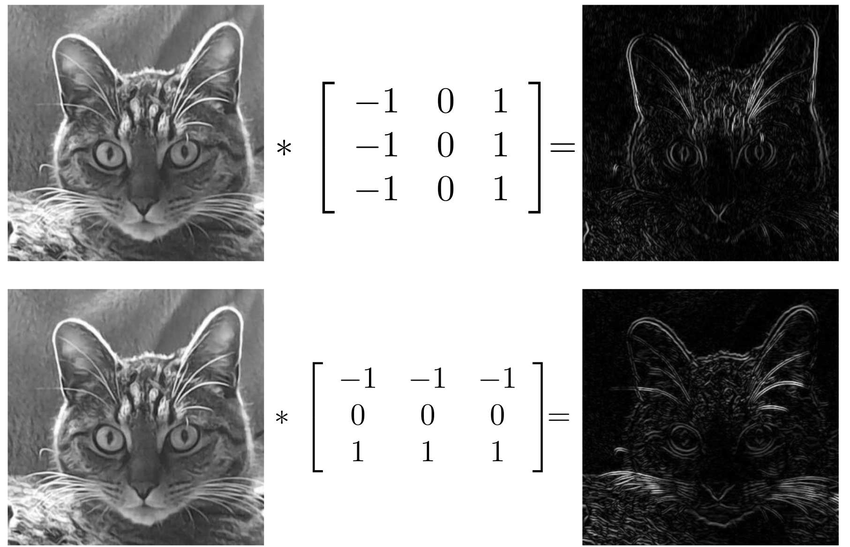

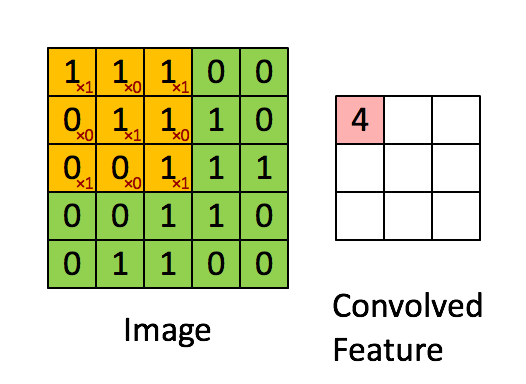

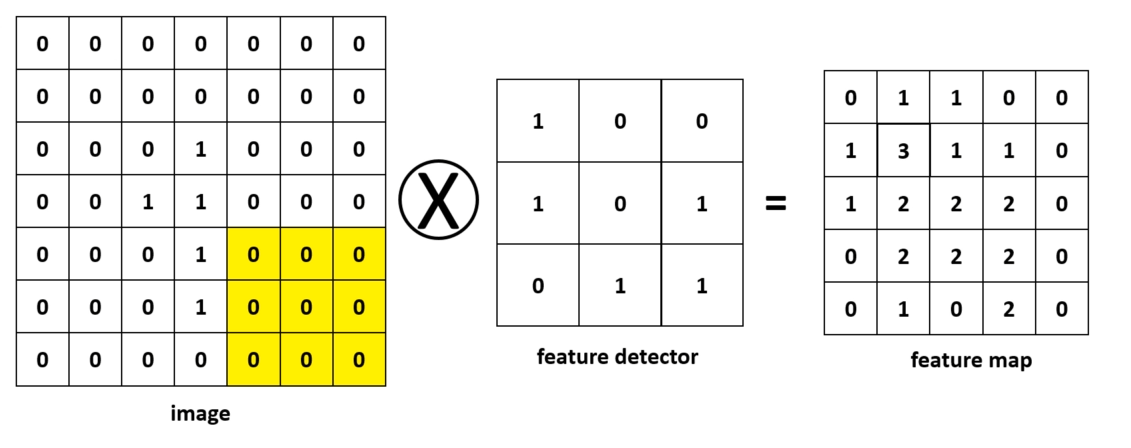

# Kernels (Filters)
<br />
AKA: template, window, mask

kernel factors



> Replacing a single large convolution kernel with a stack of multiple small convolution kernels,
can improve the accuracy and reduce the amount of calculation and parameters of the architecture


Two approaches to using filters
- order and statistics (no weights)
- calculations (weighted)

### High-pass filters
- amplify rapid intensity changes (edges) by removing low-frequency components, making details more visible
- Common kernels like Laplacian or Sobel highlight high-frequency patterns
- Used for image sharpening, medical imaging (e.g., vessel detection), and preprocessing for edge-based computer vision tasks

### Low-pass filters

-  blur images by suppressing high-frequency details (like noise and edges) while preserving gradual intensity changes, using kernels such as the Gaussian or box filter
- effectively acting as localized smoothing operators
-  preprocessing (noise removal), anti-aliasing, and downsampling, but can cause edge loss if over-applied

## Edge detection

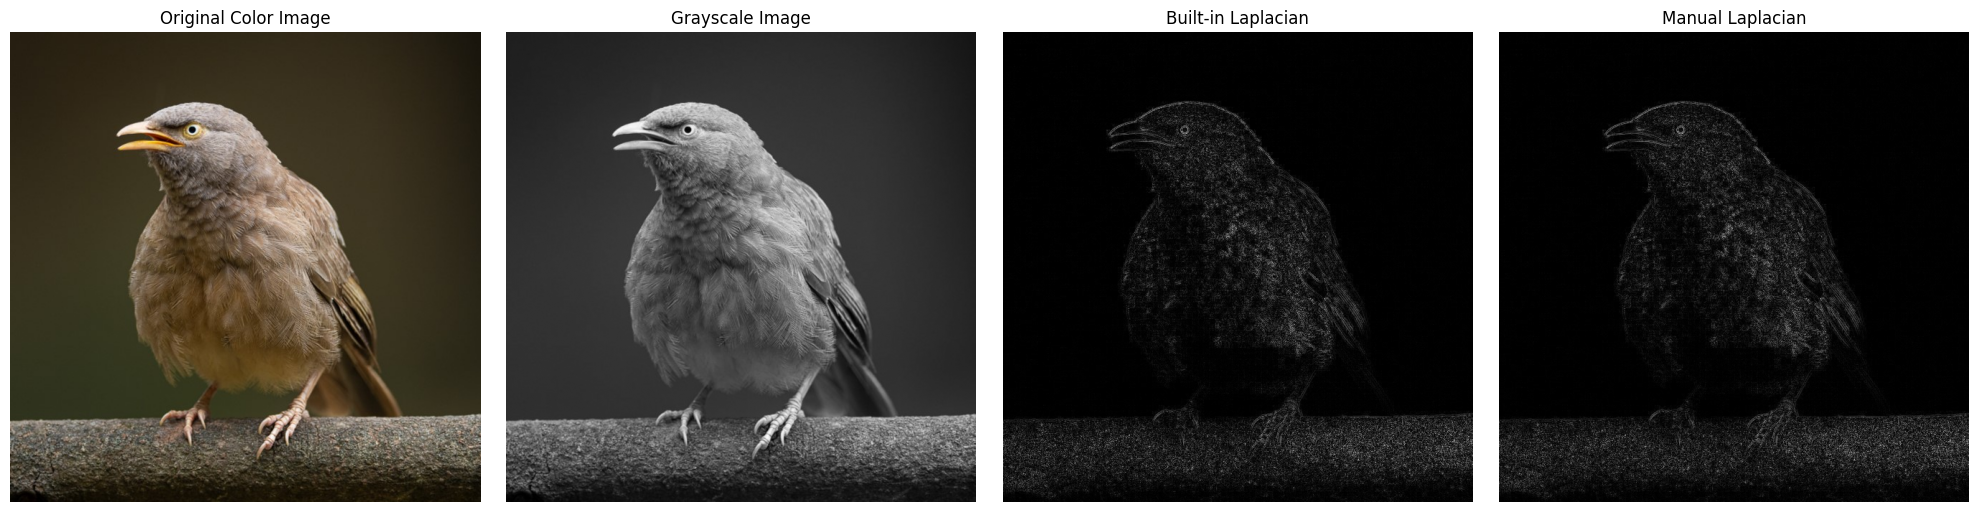

In [ ]:
# Load image
original_image = cv2.imread('bird.jpg', cv2.IMREAD_COLOR)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Laplacian edge detection (built-in)
result_image = cv2.Laplacian(gray_image, cv2.CV_64F)

# Laplacian edge detection (manual kernel)
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
result_image_m = cv2.filter2D(gray_image, cv2.CV_64F, kernel)

# Convert to absolute values and scale to 0-255
result_image = cv2.convertScaleAbs(result_image)
result_image_m = cv2.convertScaleAbs(result_image_m)

# Display using subplots
plt.figure(figsize=(20, 5))

# Original color image
plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original Color Image')
plt.axis('off')

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Built-in Laplacian
plt.subplot(1, 4, 3)
plt.imshow(result_image, cmap='gray')
plt.title('Built-in Laplacian')
plt.axis('off')

# Manual Laplacian
plt.subplot(1, 4, 4)
plt.imshow(result_image_m, cmap='gray')
plt.title('Manual Laplacian')
plt.axis('off')

plt.tight_layout()
plt.show()

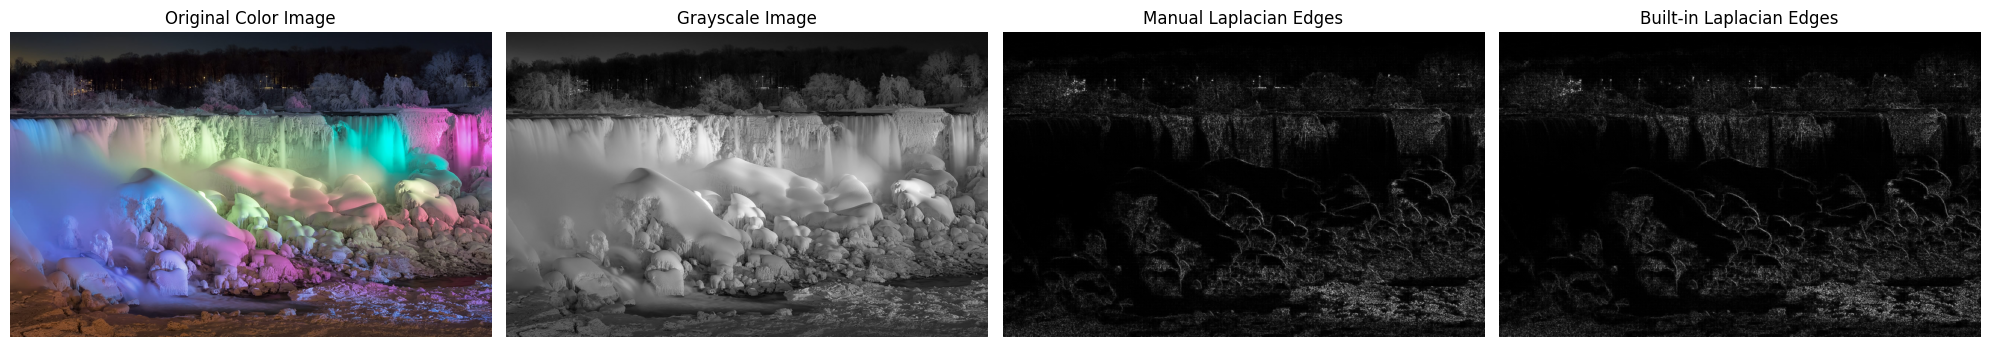

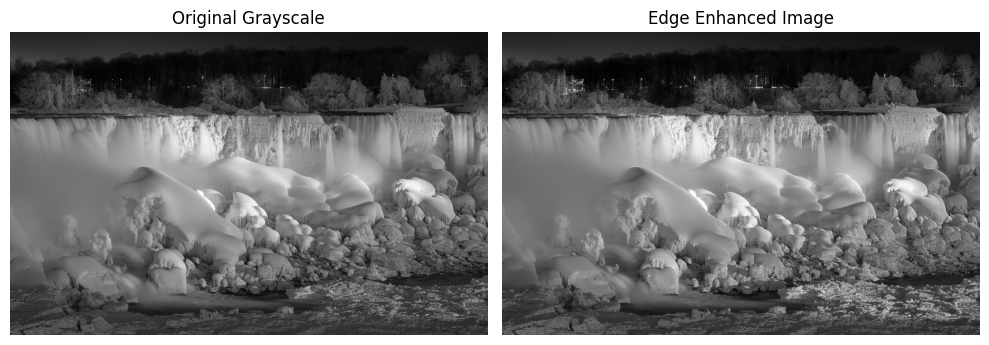

In [ ]:
# Load image
original_image = cv2.imread('niagara.jpg', cv2.IMREAD_COLOR)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Laplacian kernel for edge detection
laplacian_kernel = np.array([[0, 1, 0],
                            [1, -4, 1],
                            [0, 1, 0]])

# Apply Laplacian to grayscale image
laplacian_result = cv2.filter2D(gray_image, cv2.CV_64F, laplacian_kernel)
laplacian_result = cv2.convertScaleAbs(laplacian_result)  # Convert to uint8

# Also apply built-in Laplacian for comparison
builtin_laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
builtin_laplacian = cv2.convertScaleAbs(builtin_laplacian)

# Display using subplots
plt.figure(figsize=(20, 5))

# Original color image
plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original Color Image')
plt.axis('off')

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Manual Laplacian result
plt.subplot(1, 4, 3)
plt.imshow(laplacian_result, cmap='gray')
plt.title('Manual Laplacian Edges')
plt.axis('off')

# Built-in Laplacian result
plt.subplot(1, 4, 4)
plt.imshow(builtin_laplacian, cmap='gray')
plt.title('Built-in Laplacian Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optional: Edge enhancement by adding Laplacian back to original
enhanced_image = cv2.addWeighted(gray_image, 1, laplacian_result, 0.5, 0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Edge Enhanced Image')
plt.axis('off')
plt.tight_layout()
plt.show()

## Sharpen

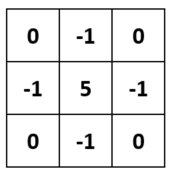

- increase the pixel intensity of given pixel
- reduce the pixel intensity of neighbor pixels
- looks like having more info and better resolution (it is not actually)
- highlight the difference in pixel values

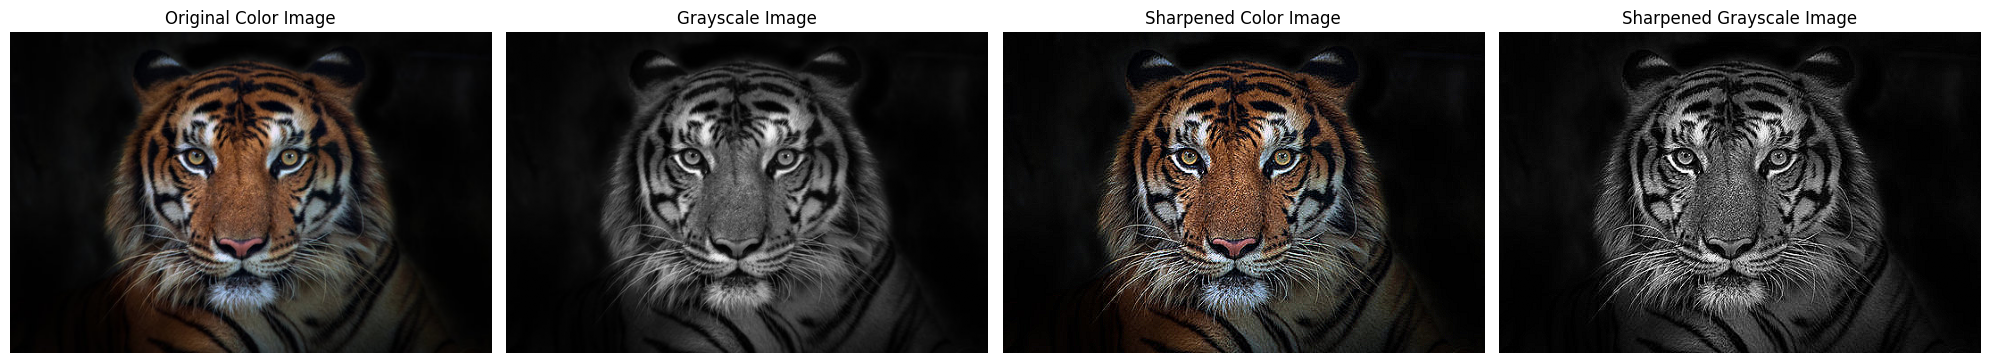

In [ ]:
# Load image
original_image = cv2.imread('tiger.jpg', cv2.IMREAD_COLOR)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Sharpening kernel
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# Apply sharpening to both color and grayscale images
sharpened_color = cv2.filter2D(original_image_rgb, -1, sharpen_kernel)
sharpened_gray = cv2.filter2D(gray_image, -1, sharpen_kernel)

# Display using subplots
plt.figure(figsize=(20, 5))

# Original color image
plt.subplot(1, 4, 1)
plt.imshow(original_image_rgb)
plt.title('Original Color Image')
plt.axis('off')

# Grayscale image
plt.subplot(1, 4, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Sharpened color image
plt.subplot(1, 4, 3)
plt.imshow(sharpened_color)
plt.title('Sharpened Color Image')
plt.axis('off')

# Sharpened grayscale image
plt.subplot(1, 4, 4)
plt.imshow(sharpened_gray, cmap='gray')
plt.title('Sharpened Grayscale Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Blur
- smears out differences
- average of neighors

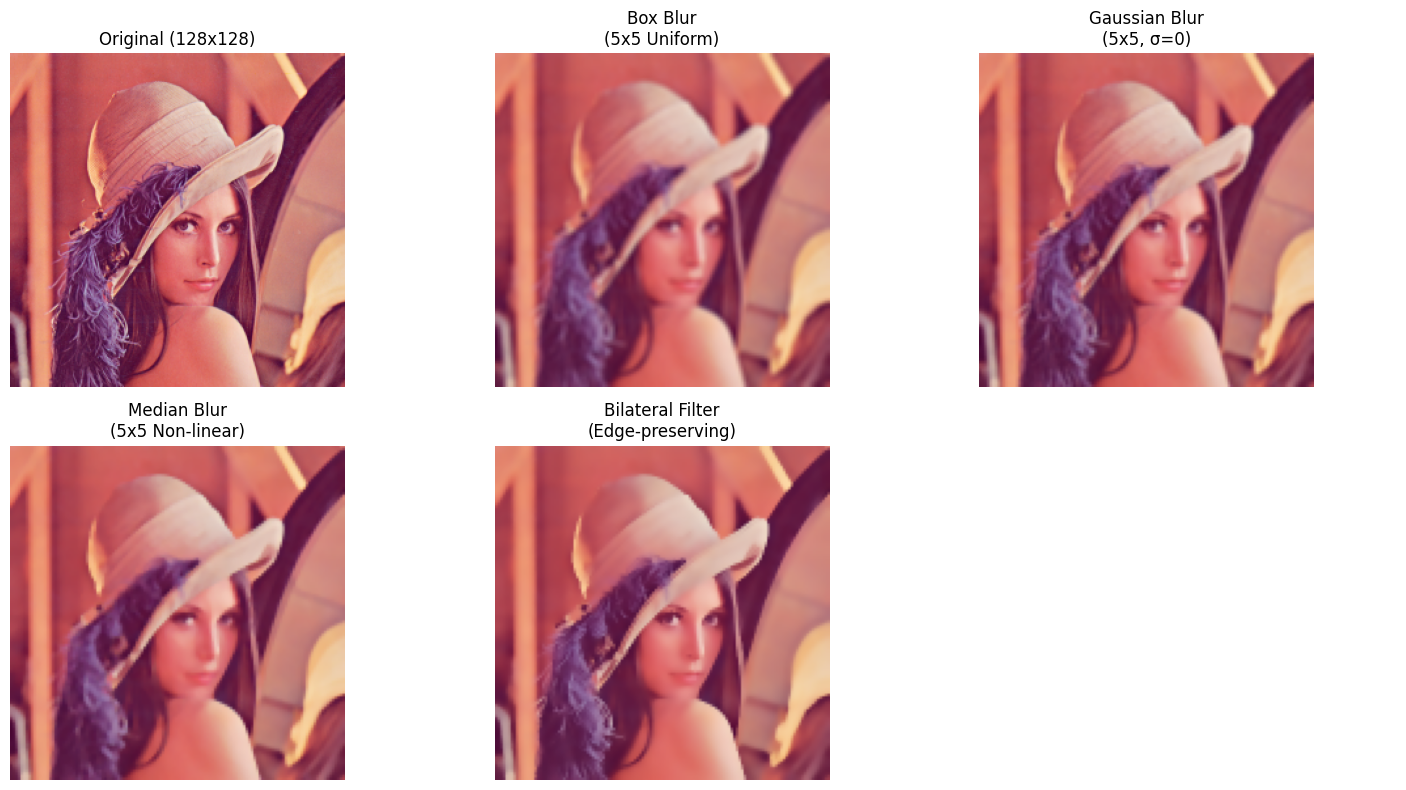

In [ ]:
# Load and resize original image
original = cv2.imread('lenna.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = cv2.resize(original, (256, 256))  # Resize to 128x128

# Create 128x128 blurred versions
box_blur = cv2.resize(cv2.filter2D(original, -1, np.ones((5,5), np.float32)/25), (128, 128))
gaussian_blur = cv2.resize(cv2.GaussianBlur(original, (5,5), 0), (128, 128))
median_blur = cv2.resize(cv2.medianBlur(original, 5), (128, 128))
bilateral_blur = cv2.resize(cv2.bilateralFilter(original, 9, 75, 75), (128, 128))

# Display results
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(original)
plt.title('Original (128x128)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(box_blur)
plt.title('Box Blur\n(5x5 Uniform)')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gaussian_blur)
plt.title('Gaussian Blur\n(5x5, σ=0)')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median_blur)
plt.title('Median Blur\n(5x5 Non-linear)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bilateral_blur)
plt.title('Bilateral Filter\n(Edge-preserving)')
plt.axis('off')

# Add kernel visualization
plt.subplot(2, 3, 6)
kernel_img = np.zeros((128, 128, 3), dtype=np.uint8)
kernel_img = cv2.putText(kernel_img, "Kernel Examples:", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
kernel_img = cv2.putText(kernel_img, "Box: 5x5 uniform", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
kernel_img = cv2.putText(kernel_img, "Gaussian: Weighted", (10, 80),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

plt.axis('off')

plt.tight_layout()
plt.show()

## Idea into a kernel (e.g., Sobel filter)

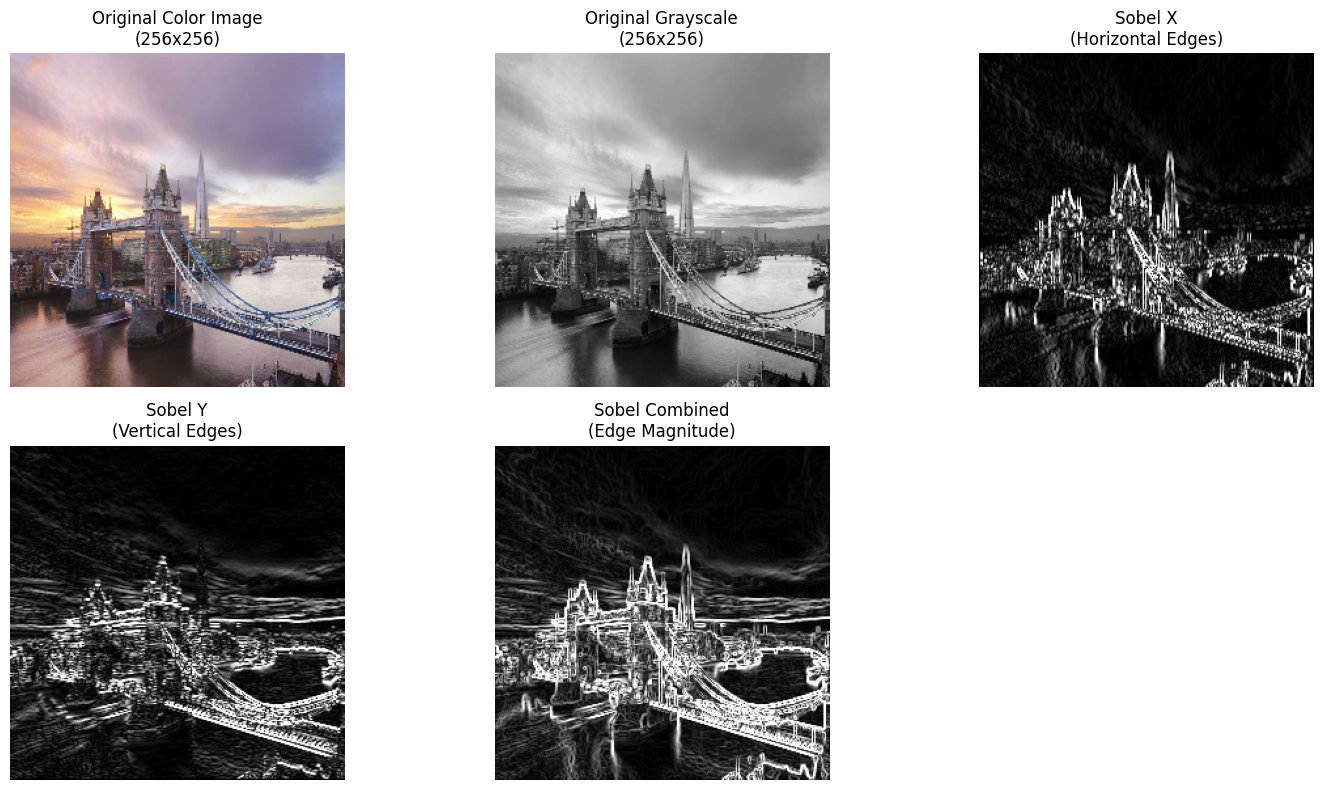

In [ ]:
# Load and prepare image
image = cv2.imread('tower-bridge.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to grayscale for processing
image = cv2.resize(image, (256, 256))           # Resize all images to 256x256
gray = cv2.resize(gray, (256, 256))

# Apply Sobel filters
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)      # Combined magnitude

# Convert to 8-bit format
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Display results
plt.figure(figsize=(15, 8))

# Original Color Image
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Color Image\n(256x256)')
plt.axis('off')

# Original Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale\n(256x256)')
plt.axis('off')

# Sobel X
plt.subplot(2, 3, 3)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X\n(Horizontal Edges)')
plt.axis('off')

# Sobel Y
plt.subplot(2, 3, 4)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y\n(Vertical Edges)')
plt.axis('off')

# Sobel Combined
plt.subplot(2, 3, 5)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined\n(Edge Magnitude)')
plt.axis('off')


plt.tight_layout()
plt.show()

## Kernel Parameters



> Note:  your kernels should be big enough or small enough to capture your features correctly

some parameters:
  - channels
  - kernel size
  - stride
  - padding (and its type/mode)
  - dilation
  - bias (threshold)



some points:
- Why small kernels (3x3, 5x5)? → Local features matter; larger kernels lose detail

Now let's dive deeper into each

### Channels
example:

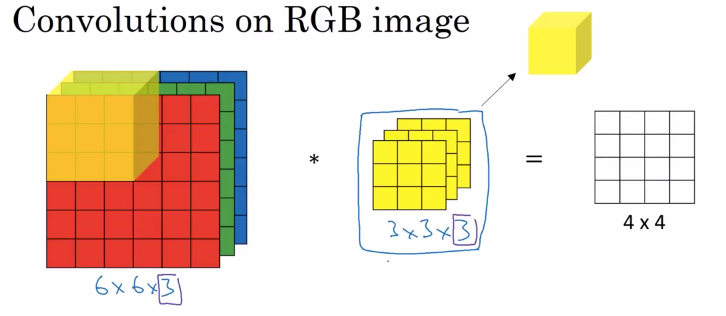

### Kernel Size


> int or tuple in most frameworks
- The rate of image shrinkage can be dramatic if the kernels used are large



### Stride

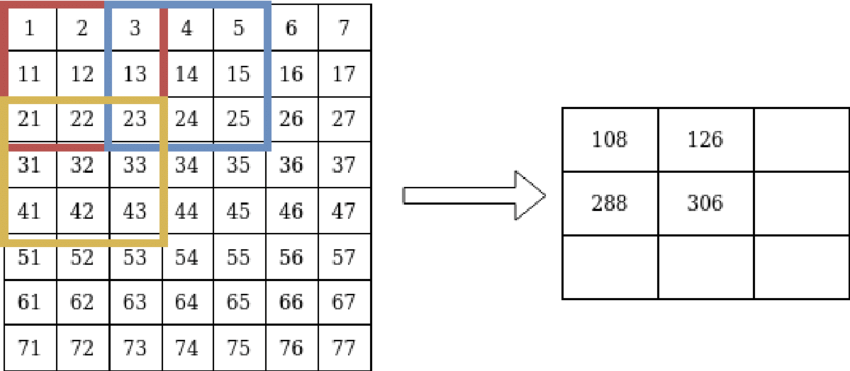

### Padding


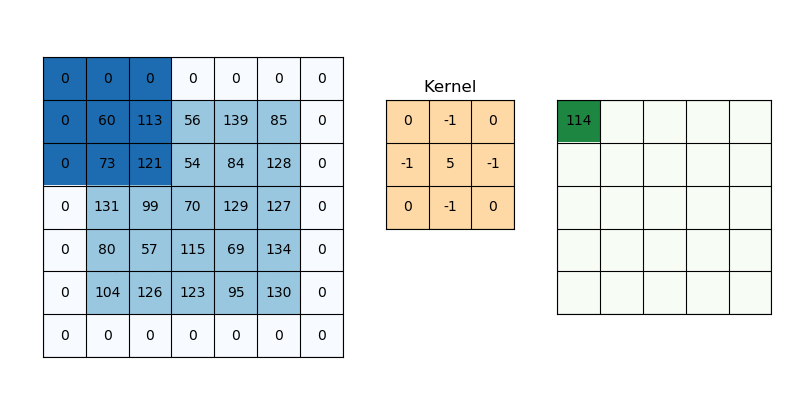

| Padding Type          | Description                              | Output Size (for stride=1)       | Border Handling                   | Use Cases                                |
|-----------------------|------------------------------------------|----------------------------------|-----------------------------------|------------------------------------------|
| **Zero Padding**      | Pads with zeros                          | `H × W` (if `padding=K//2`)      | Sharp artificial edges            | CNNs, general filtering                 |
| **Replicate Padding** | Extends border pixel values              | `H × W`                          | Repeats last pixel                | Natural image processing                |
| **Reflect Padding**   | Mirrors image at edges                   | `H × W`                          | Smooth transitions                | Edge detection, denoising               |
| **Wrap Padding**      | Treats image as periodic (torus)         | `H × W`                          | Circular continuity               | Signal processing (rare for images)     |
| **Valid (No Padding)**| No padding applied                       | `(H-K+1) × (W-K+1)` (shrinks)    | Loses border pixels               | Dimension reduction                     |
| **Same Padding**      | Pads to preserve input size              | `H × W`                          | Symmetric padding (if kernel odd) | CNNs (e.g., `padding='same'` in TF/PyTorch) |


#### Padding types/modes

#### Not using paddings:
- trim the border
- reduce image size
- the objects of interest are rarely found on  borders
- we get rid of data in pooling operations anyway

some points:
- Zero padding is like not using that parts of the kernel
- For even-sized kernels, we would need to pad by a different number on the left and right (and top and bot-
tom)
- It’s best to stay with odd kernel sizes

### Bias
-  a learnable parameter that adds a constant value to each output feature map after convolution, shifting the activation baseline without affecting the spatial structure
- Unlike a threshold, bias does not enforce a cutoff—it simply adjusts the output distribution, while thresholding (e.g., ReLU) actively suppresses values below a specified level



>  Bias: Output = (Input * Weight) + Bias  


> Threshold: Output = max(0, Input)





### dilation

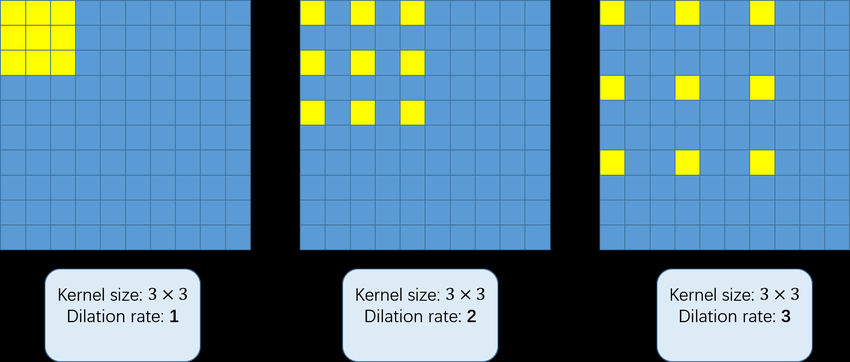

# Image Denoising / Noise Reduction

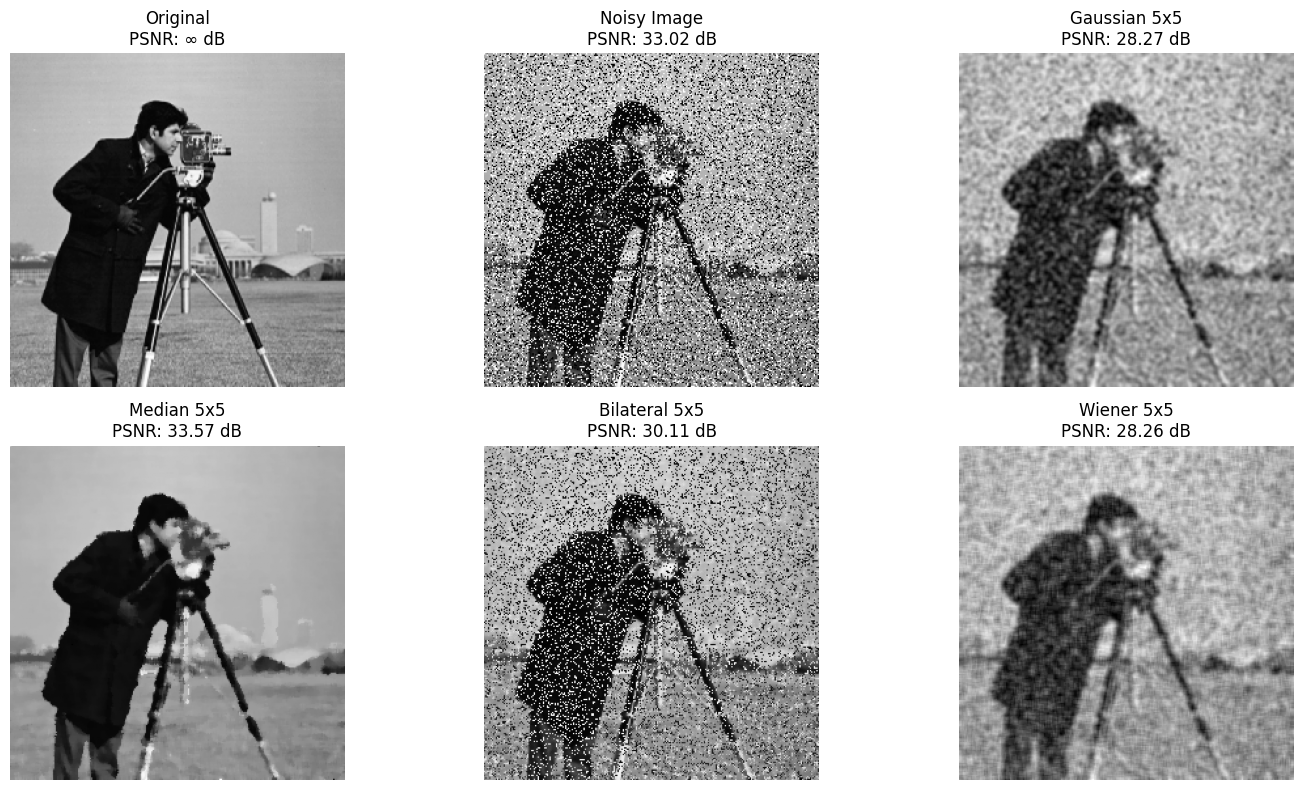

In [ ]:
# Load and prepare image
image = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("'cameraman.png' not found. Please check the file path.")
image = cv2.resize(image, (256, 256))

# Add 30% salt-and-pepper noise
noisy = random_noise(image, mode='s&p', amount=0.3)
noisy = (noisy * 255).astype(np.uint8)

# Denoising functions
def gaussian_denoise(img, ksize, sigma):
    return cv2.GaussianBlur(img, (ksize, ksize), sigma)

def median_denoise(img, ksize):
    return cv2.medianBlur(img, ksize)

def bilateral_denoise(img, ksize, sigma_color, sigma_space):
    return cv2.bilateralFilter(img, ksize, sigma_color, sigma_space)

def wiener_denoise(img, ksize):
    return cv2.filter2D(img, -1, np.ones((ksize, ksize))/(ksize*ksize))

# Apply all methods with kernel size 5
ksize = 5
gaussian = gaussian_denoise(noisy, ksize, sigma=1.5)
median = median_denoise(noisy, ksize)
bilateral = bilateral_denoise(noisy, ksize, sigma_color=75, sigma_space=75)
wiener = wiener_denoise(noisy, ksize)

# Calculate PSNR
def psnr(orig, denoised):
    mse = np.mean((orig - denoised) ** 2)
    return 10 * np.log10(255**2 / mse) if mse != 0 else float('inf')

# Visualization
plt.figure(figsize=(15, 8))

# Original and Noisy
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original\nPSNR: ∞ dB')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy, cmap='gray')
plt.title(f'Noisy Image\nPSNR: {psnr(image, noisy):.2f} dB')
plt.axis('off')

# Denoised Results
plt.subplot(2, 3, 3)
plt.imshow(gaussian, cmap='gray')
plt.title(f'Gaussian {ksize}x{ksize}\nPSNR: {psnr(image, gaussian):.2f} dB')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(median, cmap='gray')
plt.title(f'Median {ksize}x{ksize}\nPSNR: {psnr(image, median):.2f} dB')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(bilateral, cmap='gray')
plt.title(f'Bilateral {ksize}x{ksize}\nPSNR: {psnr(image, bilateral):.2f} dB')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(wiener, cmap='gray')
plt.title(f'Wiener {ksize}x{ksize}\nPSNR: {psnr(image, wiener):.2f} dB')
plt.axis('off')

plt.tight_layout()
plt.show()

# Trainable filters (in CNNs)

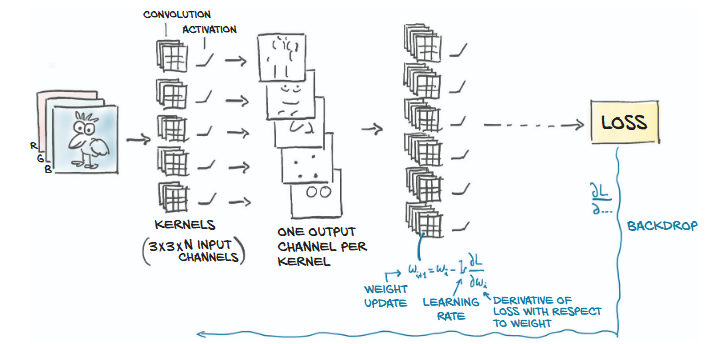

- The kernel are not known in advance, but they are initialized randomly and updated through backpropagation
- Random filters often work surprisingly well in convolutional networks
-  Because we are randomly initializing them, some of the features we’ll
get, even after training, will turn out to be useless


> lottery ticket hypothesis: many kernels will be as useful as losing lottery tickets


# Bonus


want to visualize CNNs?
[click here](https://poloclub.github.io/cnn-explainer/)
<br>
want roadmaps? [click here](https://roadmap.sh)
<br>
SUT course for advanced CV

# Sources

- My own knowledge
<br />
- Courses:
 - Computer Vision Bootcamp with Python OpenCV YOLO SSD
 - Convolutional Neural Networks with TensorFlow in Python
- books:
 - Machine Intelligence: Computer Vision and Natural Language
 - Deep Learning with PyTorch: Build, train, and tune neural
 - Deep Learning Ian Goodfellow
- Articles:
 - The Comparison and Analysis of Classic Convolutional Neural Network
 - The Lottery Ticket Hypothesis: Finding Sparse, Trainable Neural Networks
in the Field of Computer Vision
- Tensorflow docs
- Pytorch docs
- LLMs
- Google
- researchgate.net